# Support Vector Machine (SVM) From Scratch

SVM is a powerful supervised learning algorithm used for classification. It works by finding the hyperplane that best separates classes by maximizing the **margin** between them.

## Key Concepts:
- **Hyperplane**: The decision boundary separating classes
- **Support Vectors**: The data points closest to the hyperplane
- **Margin**: The distance between the hyperplane and the support vectors
- **Hinge Loss**: The loss function used for maximum margin classification
- **Kernel Trick**: Projecting data into higher dimensions to solve non-linear problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as SklearnSVM

## 1. Mathematical Foundation

### Decision Boundary
For binary classification with labels $y \in \{-1, 1\}$:
$$f(x) = w \cdot x - b$$

### Objective Function (Primal)
We want to minimize $\frac{1}{2}||w||^2$ subject to $y_i(w \cdot x_i - b) \geq 1$.

Using **Hinge Loss** for soft margin SVM, the cost function becomes:
$$J(w, b) = \frac{1}{2}||w||^2 + C \sum_{i=1}^n \max(0, 1 - y_i(w \cdot x_i - b))$$

Where $C$ is the regularization parameter.

### Gradient Descent Updates
If $y_i(w \cdot x_i - b) \geq 1$:
$$w = w - \eta \cdot (2\lambda w)$$
Else:
$$w = w - \eta \cdot (2\lambda w - y_i x_i)$$
$$b = b - \eta \cdot y_i$$

In [2]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

## 2. Testing and Visualization

In [3]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

svm = SVM()
svm.fit(X, y)

print(f"Our SVM Accuracy: {svm.score(X, y):.4f}")

Our SVM Accuracy: 1.0000


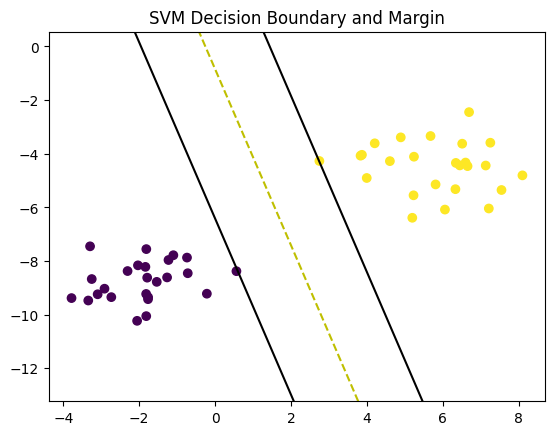

In [4]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.title("SVM Decision Boundary and Margin")
    plt.show()

visualize_svm()